In [1]:
import os
import zipfile
from google.colab import files

In [2]:
upload = files.upload()

Saving Apples_and_Oranges.zip to Apples_and_Oranges.zip


In [45]:
zip_ref = zipfile.ZipFile("./Apples_and_Oranges.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

In [46]:
base_dir = 'tmp/Apples_and_Oranges'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Test')
train_apple_dir = os.path.join(train_dir, 'Apple')
train_oranges_dir = os.path.join(train_dir, 'Oranges')
val_apple_dir = os.path.join(validation_dir, 'Apple')
val_oranges_dir = os.path.join(validation_dir, 'Oranges')

In [47]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 87 images belonging to 3 classes.
Found 16 images belonging to 2 classes.


In [42]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=1,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=5,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20


1/1 - 3s - loss: 0.7020 - accuracy: 0.4000 - val_loss: 0.6900 - val_accuracy: 0.5000 - 3s/epoch - 3s/step
Epoch 2/20
1/1 - 1s - loss: 0.4408 - accuracy: 0.4500 - 947ms/epoch - 947ms/step
Epoch 3/20
1/1 - 1s - loss: 0.4545 - accuracy: 0.4000 - 1s/epoch - 1s/step
Epoch 4/20
1/1 - 1s - loss: 0.4042 - accuracy: 0.4000 - 1s/epoch - 1s/step
Epoch 5/20
1/1 - 1s - loss: 0.1132 - accuracy: 0.6000 - 1s/epoch - 1s/step
Epoch 6/20
1/1 - 1s - loss: 1.0156 - accuracy: 0.3500 - 817ms/epoch - 817ms/step
Epoch 7/20
1/1 - 1s - loss: 0.4331 - accuracy: 0.5000 - 691ms/epoch - 691ms/step
Epoch 8/20
1/1 - 0s - loss: 0.4697 - accuracy: 0.7143 - 200ms/epoch - 200ms/step
Epoch 9/20
1/1 - 1s - loss: 0.2853 - accuracy: 0.4500 - 1s/epoch - 1s/step
Epoch 10/20
1/1 - 2s - loss: 0.4977 - accuracy: 0.5000 - 2s/epoch - 2s/step
Epoch 11/20
1/1 - 1s - loss: 0.3281 - accuracy: 0.6000 - 1s/epoch - 1s/step
Epoch 12/20
1/1 - 1s - loss: 0.0675 - accuracy: 0.4000 - 1s/epoch - 1s/step
Epoch 13/20
1/1 - 0s - loss: -3.2622e-01 -

Text(0.5, 1.0, 'Training and validation loss')

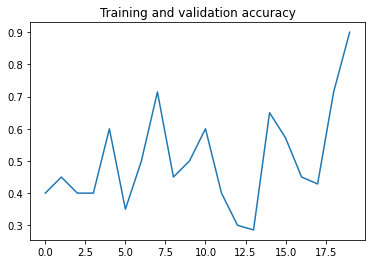

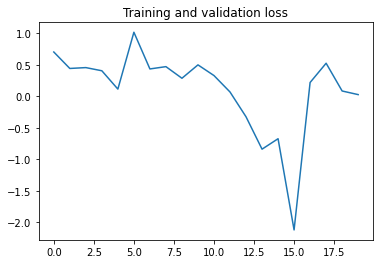

In [43]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs
epochs1   = range(len(val_acc))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs1, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs1, val_loss )
plt.title ('Training and validation loss'   )

In [44]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a orange")
  else:
    print(fn + " is a apple")

Saving Screenshot 2023-01-19 171017.png to Screenshot 2023-01-19 171017 (1).png
1/1 [==============================] - 0s 65ms/step
[0.23761764]
Screenshot 2023-01-19 171017.png is a apple
